In [105]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Programmieraufgabe

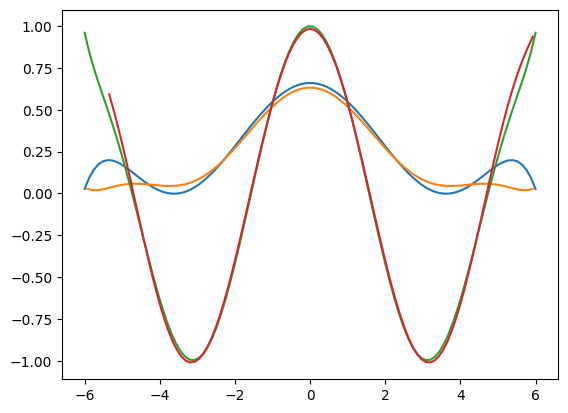

In [106]:
def interpoly(x, f):
    polynomial = np.poly1d(0)

    for i in range(len(x)):
        base_node = 1
        for j in range(len(x)):
            if i != j:
                base_node *= np.poly1d([1, -x[j]])/ (x[i]-x[j])
        polynomial += base_node * f[i]
    
    points = np.linspace(np.min(x), np.max(x), 100)
    points_f = [polynomial(point) for point in points]

    plt.plot(points, points_f)

f = lambda x: 1/(1+x**2)

x = np.linspace(-6, 6, 8)
y = np.array([f(point) for point in x])

interpoly(x, y)

# Funktion für Berechnung der Tschebyscheff-Stützstellen
t = lambda a, b, n, j: (a+b)/2 + (b-a)/2 * np.cos(((2*j - 1) / (2*(n+1))) * np.pi)

n = 9
x_T = np.array([t(-6, 6, n, j) for j in range(1, n+2)])
y_T = np.array([f(point) for point in x_T])

interpoly(x_T, y_T)

f = lambda x: np.cos(x)

x = np.linspace(-6, 6, 9)
y = np.array([f(point) for point in x])

interpoly(x, y)

x_T = np.array([t(-6, 6, 9, i+1) for i in range(9)])
y_T = np.array([f(point) for point in x_T])

interpoly(x_T, y_T)

### 3. Programmieraufgabe

In [107]:
def ableitungsplot(f,a,b,n,h):
    # Wertepaare ausrechnen
    x = np.linspace(a,b,n)
    y = np.zeros(n, dtype=np.double) # Funktion
    y1 = np.zeros(n, dtype=np.double) # erste Ableitung
    y2 = np.zeros(n, dtype=np.double) # zweite Ableitung
    for i in range(n):
        y[i] = f(x[i])
        y1[i] = (f(x[i]+h)-f(x[i]-h))/(2*h)
        y2[i] = (f(x[i]-h)-2*f(x[i])+f(x[i]+h))/(h**2)
    
    # Plot der Funktionen
    plt.clf()
    plt.plot(x, y, color = 'black', linewidth=0.6, label="Funktion f(x)") 
    plt.plot(x, y1, color = 'blue', linewidth=0.6, label="Erste Ableitung f'(x)")
    plt.plot(x, y2, color = 'cyan', linewidth=0.6, label="Zweite Ableitung f''(x)")
    plt.legend(loc="upper right")
    plt.xlim(a,b)
    plt.xlabel("x") 
    plt.ylabel("y")
    plt.title("Plot der Funktion und den ersten beiden Ableitungen", pad ='15')
    plt.show() 

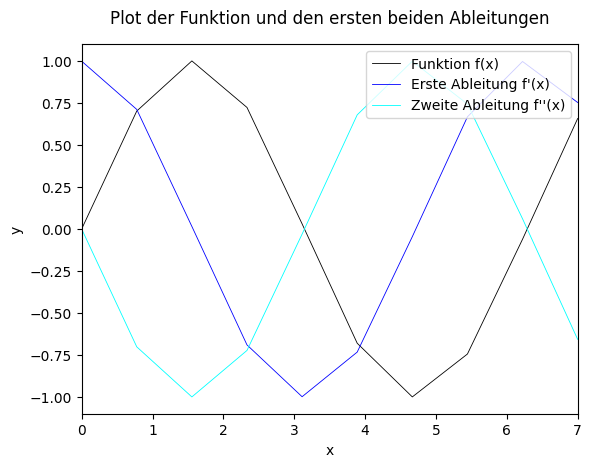

In [108]:
a = 0
b = 7
n = 10
h = 0.1
def f(x):
    f = np.sin(x)
    return f

ableitungsplot(f,a,b,n,h)

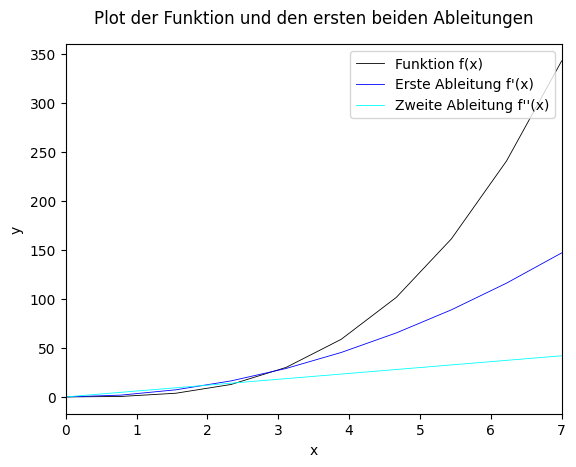

In [109]:
a = 0
b = 7
n = 10
h = 0.1
def f(x):
    f = x**3
    return f

ableitungsplot(f,a,b,n,h)

### 4. Programmieraufgabe

In [110]:
def integral(f,a,b,n):
    t = np.zeros(1, dtype=np.double)
    s = np.zeros(1, dtype=np.double)
    h = (b-a)/(n-1)
    x = np.array([a],dtype=np.double)
    for i in range(n):
        x = np.append(x, a+(i+1)*h)
        #summierte Trapezregel
        t = np.append(t, h/2*(f(x[i])+f(x[i+1])))
        #summierte Simpsonregel
        s = np.append(s, h / 6 * (f(x[i]) + 4 * f((x[i]+x[i+1]) / 2) + f(x[i + 1])))
    T = np.sum(t)   
    S = np.sum(s)
    return T,S

def f(x):
    f = x**3
    return f

In [111]:
a = 0
b = 1
n = 100
[T,S] = integral(f,a,b,n)
print("Nach der summierten Trapezregel gilt: T=",T)
print("Nach der summierten Simpsonregel gilt: S=", S)

Nach der summierten Trapezregel gilt: T= 0.26028111443019636
Nach der summierten Simpsonregel gilt: S= 0.2602550889213043
